In [2]:
import matplotlib.pyplot as plt  #导入matplotlib库
import numpy as np  #导入numpy库
import pandas as pd  #导入pandas库

In [2]:
df = pd.read_csv('..//z_data//3_film.csv') #读取csv数据
df.head()  #展示前五行数据

,filmnum,filmsize,ratio,quality
0,45,106,17,6
1,44,99,15,18
2,61,149,27,10
3,41,97,27,16
4,54,148,30,8


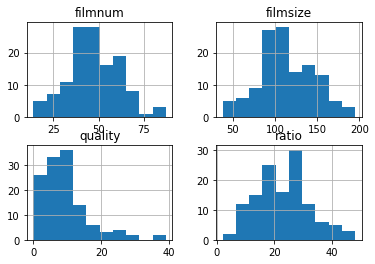

In [8]:
#plt.figure(figsize=(15,8))  #设置图片尺寸
df.hist() #绘制直方图
plt.show()

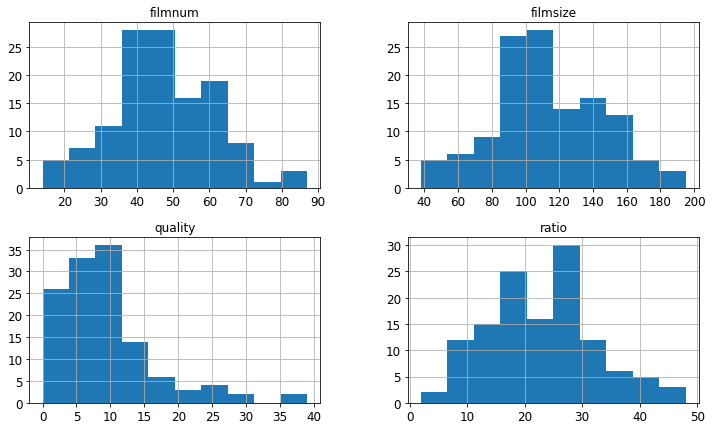

In [12]:
df.hist(xlabelsize=12,ylabelsize=12,figsize=(12,7))  #调整直方图尺寸
plt.show()

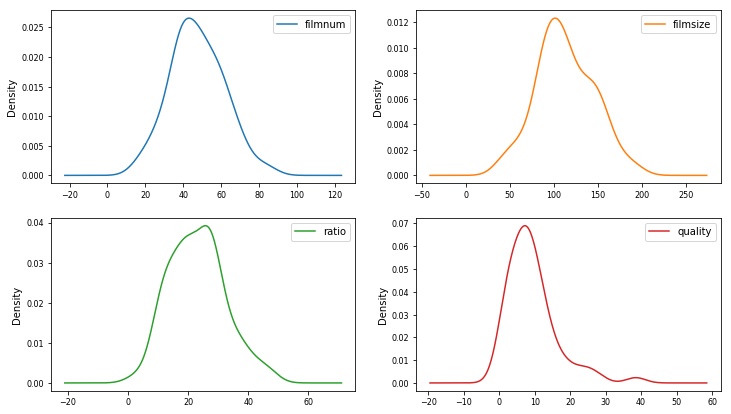

In [14]:
#绘制密度图
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False,fontsize=8,figsize=(12,7))
plt.show()

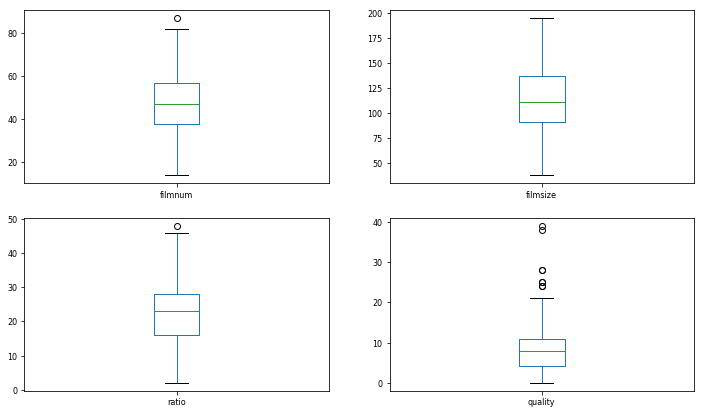

In [15]:
#绘制箱线图
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, fontsize=8,figsize=(12,7))
plt.show()

In [21]:
names = ['filmnum','filmsize','ratio','quality'] #设置变量名

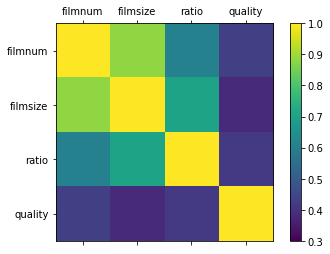

In [31]:
correlations = df.corr()  #计算变量之间的相关系数矩阵
# 绘制相关系数热力图
fig = plt.figure() #调用figure创建一个绘图对象
ax = fig.add_subplot(111) # 调用画板绘制第一个子图
cax = ax.matshow(correlations, vmin=0.3, vmax=1)  #绘制热力图，从0.3到1
fig.colorbar(cax)  #将matshow生成热力图设置为颜色渐变条
ticks = numpy.arange(0,4,1) #生成0-4，步长为1
ax.set_xticks(ticks)  #生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names) #生成x轴标签
ax.set_yticklabels(names)
plt.show()

In [20]:
correlations  #相关系数矩阵

,filmnum,filmsize,ratio,quality
filmnum,1.000000,0.883480,0.607899,0.433402
filmsize,0.883480,1.000000,0.706425,0.383146
ratio,0.607899,0.706425,1.000000,0.419036
quality,0.433402,0.383146,0.419036,1.000000


E:\program files\ananconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


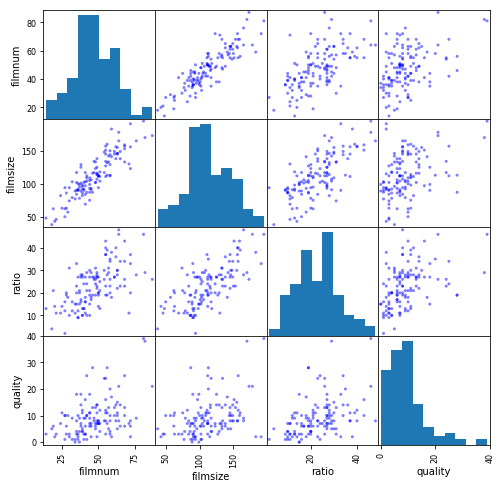

In [34]:
from pandas.tools.plotting import scatter_matrix  #导入散点图矩阵
scatter_matrix(df,figsize=(8,8), c='b')  #绘制散点图
plt.show()

In [3]:
X = df.iloc[:,1:4]  #选取data中的RM变量
y =df.filmnum  #设定target为y

In [37]:
y.head()

0    45
1    44
2    61
3    41
4    54
Name: filmnum, dtype: int64

In [4]:
from sklearn.cross_validation import train_test_split #导入数据划分包 
# 把X、y转化为数组形式，以便于计算
X = np.array(X.values)  
y = np.array(y.values) 
#以25%的数据构建测试样本，剩余作为训练样本
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state =1)

E:\program files\ananconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((94L, 3L), (32L, 3L), (94L,), (32L,))

In [6]:
from sklearn.linear_model import LinearRegression #使用LinearRegression库
lr=LinearRegression()  #设定回归算法
lr.fit(X_train,y_train) #使用训练数据进行参数求解

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print '求解截距项为：',lr.intercept_

求解截距项为： 4.353106493779016


In [8]:
print '求解系数为：',lr.coef_

求解系数为： [ 0.37048549 -0.03831678  0.23046921]


In [9]:
y_hat = lr.predict(X_test) #对测试集的预测
y_hat[0:9]  #打印前10个预测值

array([20.20848598, 74.31231952, 66.97828797, 50.61650336, 50.53930128,
       44.72762082, 57.00320531, 35.55222669, 58.49953514])

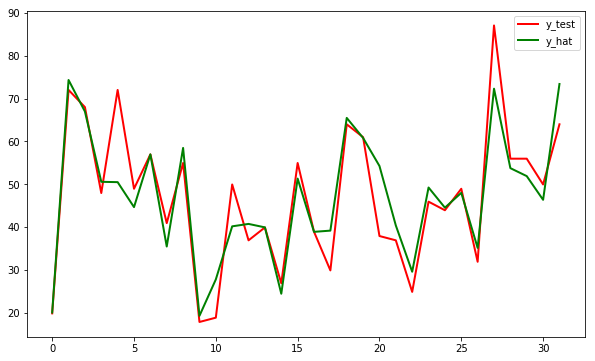

In [10]:
plt.figure(figsize=(10,6))  #设置图片尺寸
t = np.arange(len(X_test))  #创建t变量
#绘制y_test曲线
plt.plot(t, y_test, 'r', linewidth=2, label='y_test') 
#绘制y_test曲线
plt.plot(t, y_hat, 'g', linewidth=2, label='y_hat') 
plt.legend() #设置图例
plt.show()

In [1]:
from sklearn import metrics
from sklearn.metrics import r2_score
# 拟合优度R2的输出方法一
print("r2:",lr.score(X_test, y_test)) 
# 拟合优度R2的输出方法二
print("r2_score:",r2_score(y_test, y_hat)) 
# 用scikit-learn计算MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_hat))
# 用scikit-learn计算MSE
print("MSE:", metrics.mean_squared_error(y_test, y_hat))
# # 用scikit-learn计算RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

ModuleNotFoundError: No module named 'scipy.special._comb'